In [1]:
import numpy as np
import matplotlib.pyplot as plt

import time as t

In [2]:
t0 = t.time()
import astropy.units as u
from astropy.coordinates import (SkyCoord, AltAz, EarthLocation)
from astropy.time import Time

t1 = t.time()
print(f"Import time: {t1-t0:.3f} s")

Import time: 0.307 s


In [22]:
ra, dec = 5.2, 30.4

N = 100
ras, decs = np.linspace(0, 360, N), np.linspace(-90, 90, N)

In [23]:
# Set up Observer
t0 = t.time()
observing_location = EarthLocation.from_geodetic(
    lon=-4.32834*u.deg, lat=43.05885*u.deg)

observing_date = Time('2020-12-18 1:00')
time_grid = observing_date + np.linspace(0, 24, 288) * u.hour
altaz = AltAz(location=observing_location, obstime=time_grid)

t1 = t.time()
print(f"Observer  : {t1-t0:.3f} s")

# Build coordinates
t0 = t.time()
print(ra, dec)
coord = SkyCoord(ra=ra*u.degree, dec=dec*u.degree, frame='icrs')
t1 = t.time()
print(f"SkyCoord  : {t1-t0:.3f} s")

# Convertion to Local
t0 = t.time()
obs_altaz = coord.transform_to(altaz)
t1 = t.time()
print(f"Convertion: {t1-t0:.3f} s")

Observer  : 0.004 s
5.2 30.4
SkyCoord  : 0.001 s
Convertion: 0.073 s


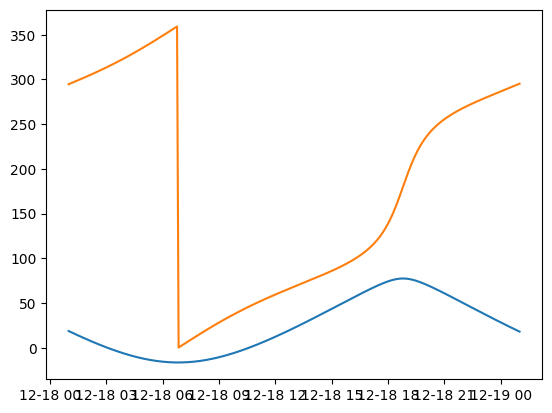

In [26]:
fig, ax = plt.subplots()

vis = obs_altaz.alt.value>0
ax.plot(time_grid.datetime, obs_altaz.alt.value)
ax.plot(time_grid.datetime, obs_altaz.az.value)


In [24]:
coord.ra.deg, coord.dec.deg

(5.2, 30.4)

In [25]:
obs_altaz.az.deg

array([2.94632785e+02, 2.95362899e+02, 2.96095886e+02, 2.96831995e+02,
       2.97571465e+02, 2.98314533e+02, 2.99061428e+02, 2.99812377e+02,
       3.00567599e+02, 3.01327312e+02, 3.02091725e+02, 3.02861046e+02,
       3.03635477e+02, 3.04415215e+02, 3.05200452e+02, 3.05991378e+02,
       3.06788175e+02, 3.07591022e+02, 3.08400092e+02, 3.09215552e+02,
       3.10037565e+02, 3.10866289e+02, 3.11701872e+02, 3.12544461e+02,
       3.13394193e+02, 3.14251197e+02, 3.15115599e+02, 3.15987514e+02,
       3.16867048e+02, 3.17754303e+02, 3.18649367e+02, 3.19552321e+02,
       3.20463236e+02, 3.21382173e+02, 3.22309180e+02, 3.23244297e+02,
       3.24187549e+02, 3.25138949e+02, 3.26098499e+02, 3.27066187e+02,
       3.28041985e+02, 3.29025852e+02, 3.30017735e+02, 3.31017560e+02,
       3.32025243e+02, 3.33040680e+02, 3.34063754e+02, 3.35094329e+02,
       3.36132254e+02, 3.37177361e+02, 3.38229462e+02, 3.39288358e+02,
       3.40353828e+02, 3.41425636e+02, 3.42503530e+02, 3.43587241e+02,
      

In [5]:
# ep = [
#     "2020-08-18 0:00",
#     "2020-09-18 0:00",
#     "2020-10-18 0:00",
#     "2020-11-18 0:00",
#     "2020-12-18 0:00",
# ]

# observing_location = EarthLocation.from_geodetic(
#     lon=-4.32834 * u.deg, lat=43.05885 * u.deg
# )



# tt = np.zeros([2, len(ep)])
# for j, e in enumerate(ep):

#     # Set up Observer
#     t0 = t.time()
#     observing_date = Time(e)
#     time_grid = observing_date + np.linspace(0, 24, 288) * u.hour
#     altaz = AltAz(location=observing_location, obstime=time_grid)
#     t1 = t.time()
#     # print(f"Observer  : {t1-t0:.3f} s")
#     tt[0, j] = t1 - t0

#     # Convertion to Local
#     t0 = t.time()
#     for i in range(N):
#         ra, dec = ras[i], decs[i]
#         coord = SkyCoord(ra=ra * u.degree, dec=dec * u.degree, frame="icrs")
#         obs_altaz = coord.transform_to(altaz)
#     t1 = t.time()
#     tt[1, j] = t1 - t0

#     # print(f"Multi time: {t1-t0:.3f} s   ({(t1-t0)/N:.3f}/SSO)")

In [7]:
tt

array([[2.02631950e-03, 5.80549240e-04, 5.76019287e-04, 5.82218170e-04,
        5.67197800e-04],
       [1.60123730e+00, 1.52453899e+00, 1.44987917e+00, 1.50259662e+00,
        1.54058814e+00]])

In [8]:
print(f"Set steps : {tt.mean(axis=1)[0]:.3f} +/- {tt.std(axis=1)[0]:.3f} s")
print(f"Convertion: {tt.mean(axis=1)[1]/N:.3f} +/- {tt.std(axis=1)[1]/N:.3f} s")

Set steps : 0.001 +/- 0.001 s
Convertion: 0.015 +/- 0.000 s


In [9]:
0.357 + 0.013

0.37

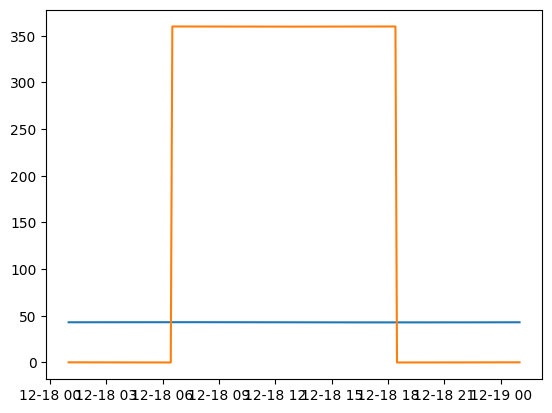

(0.0, 90.0)

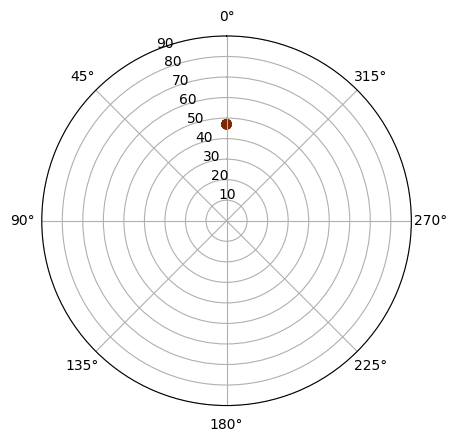

In [11]:
fig, ax = plt.subplots(subplot_kw={'projection': 'polar'})

ax.scatter(obs_altaz.az.rad, 90-obs_altaz.alt.value, c=time_grid.jd, cmap='Oranges')

ax.set_theta_zero_location("N")  # theta=0 at the top
# ax.set_theta_direction(-1)  # theta increasing clockwise
ax.set_ylim(0, 90)


In [9]:
obs_altaz.az.rad, 90-obs_altaz.alt.value

(array([2.85626959e-03, 2.86384741e-03, 2.87004627e-03, 2.87486301e-03,
        2.87829513e-03, 2.88034079e-03, 2.88099882e-03, 2.88026873e-03,
        2.87815069e-03, 2.87464553e-03, 2.86975476e-03, 2.86348056e-03,
        2.85582577e-03, 2.84679390e-03, 2.83638913e-03, 2.82461630e-03,
        2.81148090e-03, 2.79698911e-03, 2.78114773e-03, 2.76396424e-03,
        2.74544677e-03, 2.72560407e-03, 2.70444557e-03, 2.68198131e-03,
        2.65822198e-03, 2.63317890e-03, 2.60686399e-03, 2.57928982e-03,
        2.55046956e-03, 2.52041699e-03, 2.48914647e-03, 2.45667299e-03,
        2.42301209e-03, 2.38817992e-03, 2.35219318e-03, 2.31506914e-03,
        2.27682562e-03, 2.23748101e-03, 2.19705420e-03, 2.15556465e-03,
        2.11303231e-03, 2.06947766e-03, 2.02492166e-03, 1.97938577e-03,
        1.93289194e-03, 1.88546258e-03, 1.83712056e-03, 1.78788919e-03,
        1.73779223e-03, 1.68685386e-03, 1.63509866e-03, 1.58255164e-03,
        1.52923817e-03, 1.47518400e-03, 1.42041527e-03, 1.364958